<a href="https://colab.research.google.com/github/JesusMedinaGomez/think-in-math/blob/main/statistics/MTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medidas de tendencia central**



Las **medidas de tendencia central** son herramientas estadísticas que permiten identificar el valor alrededor del cual se agrupan o tienden a concentrarse los datos de un conjunto. En otras palabras, indican el "centro" o el comportamiento típico de los datos. No hay una única forma de medir dicha tendencia, y las tres más conocidas son la **media**, la **mediana** y la **moda**.

## **previos**

### Librerías

In [1777]:
import numpy as np
import matplotlib.pyplot as plt

### Funciones a usar

In [1778]:
def graficar(x, medida):
  fig, ax = plt.subplots(figsize=(14, 1))
  ax.hlines(0, min(x)-1, max(x)+1, 'k')

  for xi in x:
      ax.plot(xi, 0, 'o', color='blue')
      ax.text(xi, 1, str(xi), ha='center', fontsize=10)

  ax.axvline(medida, color='red', ls='--', label=f'Medida = {medida:.2f}')
  ax.set(ylim=(-0.5,0.5), yticks=[])
  ax.set_xticks(range(int(min(x))-1, int(max(x))+2))
  ax.set(xlabel="Recta numérica", title="Representación de los datos en la recta numérica")
  ax.grid(True, axis='x', ls='--', alpha=0.5)
  plt.show()

## **Media**



La **media aritmética**, también conocida como **promedio**, es una medida de tendencia central que resume un conjunto de datos numéricos mediante un solo valor representativo. Sea $x=(x_1, x_2, \dots, x_n)$ una muestra finita de datos reales, es decir, $x_i \in \mathbb{R}$ para todo $i = 1, \dots, n$. La media aritmética se calcula con la fórmula:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

donde $n$ es el tamaño de la muestra. Esta medida es útil para describir el comportamiento general de los datos, especialmente cuando no existen valores atípicos que distorsionen su interpretación.



### Algoritmo

In [1779]:
def media(x):
  n = len(x)
  suma = 0

  for i in range(0, n):
    suma += x[i]
  return suma / n

### Ventajas y desventajas

- Utiliza **todos los valores del conjunto de datos**, lo que proporciona una visión completa.
- Es **fácil de calcular**.
- Es muy útil cuando los datos tienen una **distribución simétrica o normal**.

**Desventajas:**
- Es **muy sensible a valores extremos** (outliers), lo que puede distorsionar su resultado.
- En distribuciones sesgadas, **puede no representar adecuadamente el centro** de los datos.

### Ejemplo




Dada la muestra
$$
x = (8.8,8.9,9,9,9.01,8.7,8.85,8.92)
$$

In [1780]:
x = [8.8,8.9,9,9,9.01,8.7,8.85,8.92]

Entonces $n=8$

In [1781]:
n = len(x)

y su media está dada por
$$
\bar{x} = \frac{1}{8} \sum_{i=1}^{8} x_i = \frac{8.8+8.9+9+9+9.01+8.7+8.85+8.92}{8}
$$

In [1782]:
promedio = media(x)
promedio

8.897499999999999

Esto quiere decir que los datos de la muestra están centrados alrededor de 8.89

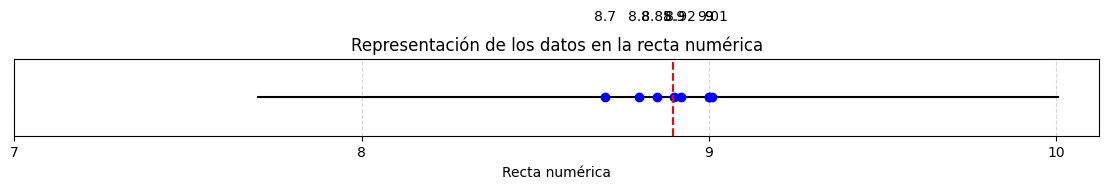

In [1783]:
graficar(x, promedio)

### Ejemplo (Situación adversa)

La media suele ser muy sensible con **valores atípicos**, es decir, que estan muy alejados de el entorno en el que se encuentran la mayora de valores. Esto podemos observarlo si al conjunto de datos anterior, cambiamos el $8.92$ por $25$
$$
8.8,8.9,9,9,9.01,8.7,8.85,25
$$


In [1784]:
x[len(x)-1] = 25
x

[8.8, 8.9, 9, 9, 9.01, 8.7, 8.85, 25]

Entonces la media sería de 10.90

In [1785]:
promedio = media(x)
promedio

10.907499999999999

Dicho valor se ha movido casi 2 unidades, cuando únicamente modificamos un valor. Y si lo graficamos nuevamente

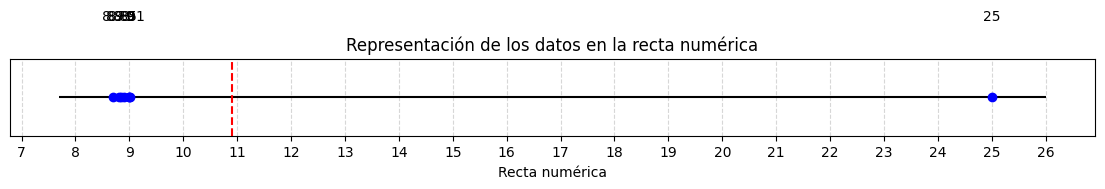

In [1786]:
graficar(x, promedio)

podremos notar que la media ya nisiquiera parece estar ubicada al centro de los datos.

## **Mediana**

La **mediana** es una medida de tendencia central utilizada para datos numéricos. Se obtiene ordenando los datos de menor a mayor y seleccionando el valor que queda exactamente en el centro de la lista ordenada. Si la cantidad de datos es par, la mediana se calcula como el promedio de los dos valores centrales.

### Algoritmo

In [1787]:
def mediana(x):
    n = len(x)

    # Si la cantidad de datos es impar, se devuelve el valor central
    if n % 2 != 0:
        mediana = x[n // 2]
    else:
        # Si es par, se promedian los dos valores centrales usando la función 'media'
        nums_centrales = [x[n // 2 - 1], x[n // 2]]
        mediana = media(nums_centrales)

    return mediana

### Ejemplo



Se tiene una muestra
$$
x = ( 0,1,3,5,10,8,21,3.5,4 )
$$

In [1788]:
x = [0,1,3,5,10,8,21,3.5,4]

Para obtener la mediana de $x$ ordenamos sus datos de menor a mayor:
$$
0,  1,  3,  3,  4,  5,  8, 10, 21
$$

In [1789]:
x_sort = np.sort(x)
x_sort

array([ 0. ,  1. ,  3. ,  3.5,  4. ,  5. ,  8. , 10. , 21. ])

Podemos observar que 4 es el número que queda justo en el centro de los datos, pues a su izquierda hay 4 números (menores) y a su derecha también hay 4 (mayores).

In [1790]:
x_med = mediana(x_sort)
int(x_med)

4

Visualizamos la mediana con respecto a los datos

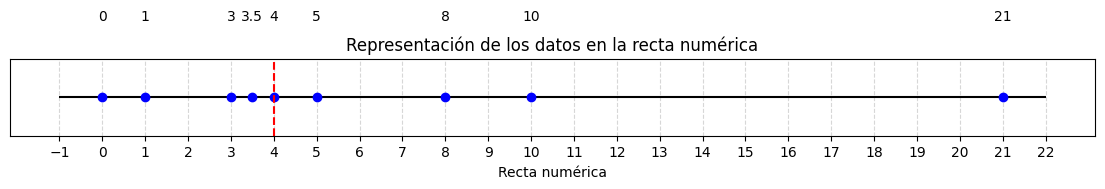

In [1791]:
graficar(x, x_med)


### Ejemplo

Se tiene la muestra
$$
x = (1,5,0,2,4,5.1)
$$

In [1792]:
x = [1,5,0,2,4,5.1]

La ordenamos y se tiene
$$
0, 1, 2, 4, 5, 5
$$

In [1793]:
x_sort = np.sort(x)
x_sort

array([0. , 1. , 2. , 4. , 5. , 5.1])

En este caso, $ |x| $ es par, por lo que no existe un único dato central. En su lugar, tomamos los dos valores que se encuentran en el centro —que son 2 y 4, ya que a ambos lados hay la misma cantidad de datos— y calculamos su media. Esta media, que es 3, será la mediana, aunque dicho valor no esté presente en la muestra original.


In [1794]:
med = mediana(x_sort)
int(med)

3

Si visualizamos la mediana con respecto a los datos

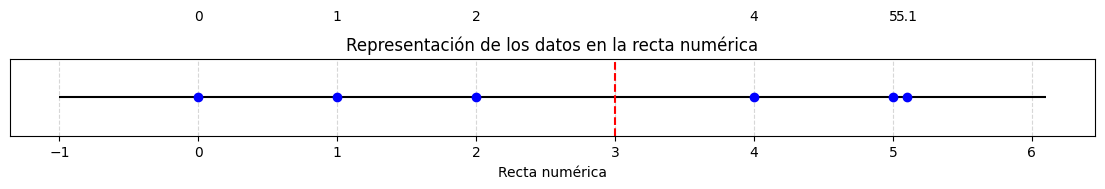

In [1795]:
graficar(x, med)


Ejemplo con valor atípico

Si al ejemplo anterior le agregamos un **valor atípico**, por cambiando $5.1$ por $30$
$$
x = (1,5,0,2,4,30)
$$

In [1796]:
x[len(x)-1] = 30
x

[1, 5, 0, 2, 4, 30]

Ordenamos

In [1797]:
x_sort = np.sort(x)
x_sort

array([ 0,  1,  2,  4,  5, 30])

Calculamos la mediana

In [1798]:
med = mediana(x_sort)
int(med)

3

Sigue siendo exacatmente la misma mediana que en el caso anterior, apesar de haber movido uno de nuestros datos muy lejos del centro.

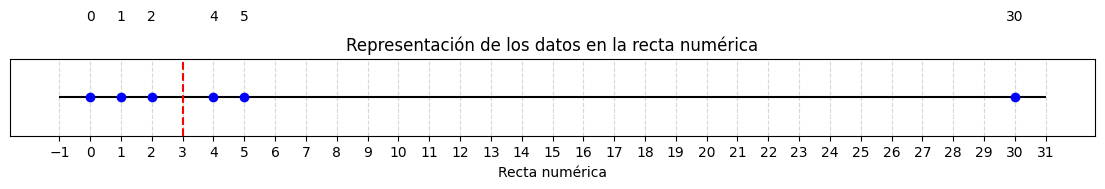

In [1799]:
graficar(x, med)

### Ventajas y desventajas

**Ventajas:**
- **No se ve afectada por valores atípico** ni valores atípicos.
- Representa mejor el centro de los datos cuando la distribución es **asimétrica**.
- Se puede usar con **datos ordinales**, no solo numéricos.

**Desventajas:**
- **No utiliza todos los valores**, solo se basa en el orden.
- Si los datos no están ordenados, calcularla puede requerir **ordenarlos primero**, lo que toma más tiempo.


## **Moda**

La **moda** es una medida de tendencia central que se puede aplicar tanto a datos cualitativos como cuantitativos. Consiste en identificar el valor o los valores que aparecen con mayor frecuencia en el conjunto de datos. Si un solo valor tiene la mayor frecuencia, ese es la moda; si varios valores comparten la misma frecuencia máxima, todos ellos se consideran modas. En ese caso, podemos entender la moda como un conjunto de valores y no como una sola cantidad numérica.

### Algoritmo

In [1800]:
def moda(x):
    if not x:
        return None

    # Contar frecuencias de cada dato
    frecuencias = {}

    for dato in x:
        if dato in frecuencias:
            frecuencias[dato] += 1
        else:
            frecuencias[dato] = 1

    # Obtener la frecuencia máxima
    max_frecuencia = max(frecuencias.values())

    # Obtener todos los datos que tienen esa frecuencia máxima
    modas = [dato for dato, f in frecuencias.items() if f == max_frecuencia]

    # Si todos los datos son únicos, no hay moda
    if len(modas) == len(frecuencias):
        return []

    return modas


### Ejemplo

Dada la muestra
$$
x = (\text{azul}, \text{rojo}, \text{verde},\text{azul} )
$$

In [1801]:
x = ['azul', 'rojo', 'verde', 'azul']

Podemos observar que *azul* aparece 2 veces, a diferencia de *rojo* y *verde*, que solo aparecen una vez. Por lo tanto, la moda de esta muestra es *azul*.

In [1802]:
moda_x = moda(x)
moda_x

['azul']

### Ejemplo multimodal

Se tiene la muestra
$$
x = (1, 2, 2, 3, 3)
$$


In [1803]:
x = [1,2,2,3,3]

En ella podemos ver que $2$ y $3$ tiene ambas el máximo de repeticiones, por lo tanto ambas son consideradas la moda de $x$.

In [1804]:
moda_x = moda(x)
moda_x

[2, 3]

### Ejemplo sin moda

Dada la muestra
$$
x = (\text{Guillermo},\text{Juan},\text{Pepe})
$$

In [1805]:
x = ['Guillermo', 'Juan', 'Pepe']

Podemos notar que ningún dato se repite, por lo tanto $x$ no tiene moda.

In [1806]:
moda_x = moda(x)
moda_x

[]

### Ventajas y desventajas


**Ventajas:**
- Es la única medida que se puede aplicar a **datos cualitativos** (como colores, nombres, categorías).
- Es **fácil de interpretar**, ya que muestra el valor más frecuente.
- Útil para detectar repeticiones o **patrones dominantes**.

**Desventajas:**
- Puede haber **más de una moda** (datos multimodales) o **ninguna**, lo que puede dificultar su interpretación.
- **No siempre representa el centro** de los datos.
- Es **poco útil** si los datos están muy dispersos o son todos diferentes.